In [1]:
# 確認
MEL_PATH = "F:/ROHAN4600マルチモーダルデータベース/mel_outs_n/"
outspath = MEL_PATH + "outs_4.npy"
outsfinepath = MEL_PATH + "outs_fine_4.npy"
melpath = MEL_PATH + "mel_4.npy"
textpath = MEL_PATH + "text_3.npy"

In [2]:
import numpy as np

outs = np.load(outspath)
outsfine = np.load(outsfinepath)
mel = np.load(melpath)
#text = np.load(textpath)

In [3]:
import torch
import librosa
import librosa.display

sr = 16000
n_fft = 800
hop_length = 200
win_length = 800
n_mels = 80

min_value = -80
max_value = 0

restored_mel_spectrogram = outsfine[0] * (max_value - min_value) + min_value
power_spec = librosa.db_to_power(restored_mel_spectrogram.T)#, ref=np.max)

inverse_mel_spectrogram = librosa.feature.inverse.mel_to_stft(
    M=power_spec,
    sr=sr,
    n_fft=n_fft
)

reconstructed_waveform = librosa.griffinlim(
    inverse_mel_spectrogram,
    n_iter=100,
    hop_length=hop_length,
    win_length=win_length
)

In [200]:
print(restored_mel_spectrogram)

[[-81.93694  -81.36335  -79.34542  ... -80.02238  -80.09335  -80.35888 ]
 [-70.74554  -69.32616  -72.67277  ... -79.234695 -78.489204 -80.97667 ]
 [-50.539368 -59.254414 -62.9138   ... -78.84538  -78.75713  -82.159225]
 ...
 [-47.756554 -58.925884 -65.45142  ... -80.306404 -80.65059  -80.38235 ]
 [-47.97664  -59.03547  -65.56295  ... -79.99507  -80.29783  -79.923676]
 [-49.096573 -59.506493 -65.58114  ... -79.980225 -80.47703  -79.718056]]


In [201]:
print(mel)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.5229336  0.4003819  0.26494923 ... 0.         0.         0.        ]
  [0.5545179  0.40216628 0.23533587 ... 0.         0.         0.        ]
  [0.5617214  0.4490003  0.34693593 ... 0.         0.         0.        ]]]


In [202]:
WAV_DIR = "F:/ROHAN4600マルチモーダルデータベース/wav_outs/"

import soundfile as sf

# 音声波形を保存するパスとサンプリングレートを指定します
output_path = WAV_DIR + '056.wav'
sr = 16000  # 例として44100Hzのサンプリングレートを使用します

# 音声波形を保存します
sf.write(output_path, reconstructed_waveform, sr)

# 出力

In [1]:
import numpy as np
import glob
import torch
import matplotlib.pyplot as plt

In [2]:
from img_Tacotron2 import Tacotron2

MODEL_DIR = "F:/model/D4/model300_100_n"
net = Tacotron2()
net.load_state_dict(torch.load(MODEL_DIR))
net.cuda()

Tacotron2(
  (encoder): Encoder(
    (embed): Embedding(32, 512, padding_idx=0)
    (convolutions): Sequential(
      (0): ConvNorm(
        (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      )
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
      (4): ConvNorm(
        (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      )
      (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5, inplace=False)
      (8): ConvNorm(
        (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      )
      (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU()
      (11): Dropout(p=0.5, inplace=False)
    )
    (blstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )


In [5]:
# tacotron2
from Tacotron2 import Tacotron2

MODEL_DIR = "F:/model/D4/tacotron2/D4/tacotron2_300_200"
net = Tacotron2()
net.load_state_dict(torch.load(MODEL_DIR))
net.cuda()

Tacotron2(
  (encoder): Encoder(
    (embed): Embedding(66, 512, padding_idx=0)
    (convolutions): Sequential(
      (0): ConvNorm(
        (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      )
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
      (4): ConvNorm(
        (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      )
      (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5, inplace=False)
      (8): ConvNorm(
        (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      )
      (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU()
      (11): Dropout(p=0.5, inplace=False)
    )
    (blstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )


In [24]:
# Tacotron2
import numpy as np
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

class Dataset(Dataset):
    def __init__(self, text_paths, mel_paths):
        self.text_paths = text_paths
        self.mel_paths = mel_paths
        
    def __getitem__(self, index):
        return np.load(self.text_paths[index]), np.load(self.mel_paths[index])

    def __len__(self):
        return len(self.text_paths)

# collate_fn関数の実装

def pad_1d(x, max_len, constant_values=0):
    """
    1次元のテンソルをパディングする関数

    PARAMS
    -------
    x: パディングするテンソル
    max_len: パディングする長さ
    constant_values: パディングの値

    RETURNS
    -------
    x: パディング済みのテンソル
    """
    x = np.pad(
        x,
        (0, max_len - len(x)),
        mode = "constant",
        constant_values=constant_values,
    )
    return x

def pad_2d(x, max_len, constant_values=0):
    """
    2次元のテンソルをパディングする関数

    PARAMS
    -------
    x: パディングするテンソル
    max_len: パディングする長さ
    constant_values: パディングの値

    RETURNS
    -------
    x: パディング済みのテンソル
    """
    x = np.pad(
        x,
        [(0, max_len - len(x)), (0, 0)],
        mode="constant",
        constant_values=constant_values,
    )
    return x

def collate_fn(batch):
    """
    PARAMS
    -------
    batch: タプルのリスト(text, mel)

    RETURNS
    -------

    MEMO
    -------
    torch.from.numpyでnumpyのArrayからtorchのTensorに変換

    """
    xs = [x[0] for x in batch]  # text list
    ys = [x[1] for x in batch]  # mel list
    in_lens = [len(x) for x in xs]  # text_len list
    out_lens = [len(y) for y in ys]  # mel_len list
    in_max_len = max(in_lens)
    out_max_len = max(out_lens)
    x_batch = torch.stack([torch.from_numpy(pad_1d(x, in_max_len)) for x in xs])
    y_batch = torch.stack([torch.from_numpy(pad_2d(y, out_max_len)) for y in ys])
    in_lens = torch.tensor(in_lens, dtype=torch.long)
    out_lens = torch.tensor(out_lens, dtype=torch.long)
    stop_flags = torch.zeros(y_batch.shape[0], y_batch.shape[1])
    for idx, out_len in enumerate(out_lens):
        stop_flags[idx, out_len-1 :] = 1.0
    return x_batch, in_lens, y_batch, out_lens, stop_flags

import glob
import torch
from torch.utils.data import DataLoader

TEXT_DIR = "F:\ROHAN4600マルチモーダルデータベース\text_data/*"
MEL_DIR = "F:\ROHAN4600マルチモーダルデータベース\normalized_db_data/*"

textlist = sorted(glob.glob(TEXT_DIR))
mellist = sorted(glob.glob(MEL_DIR))
#print(mellist)

dataset = Dataset(textlist, mellist)
#batch_size = 32
#data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)

n_samples = len(dataset)
train_size = int(len(dataset) * 0.9)
test_size = n_samples - train_size
#print(train_size)
#print(test_size)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#print(len(train_dataset))
#print(len(test_dataset))

batch_size = 1
#train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [23]:
text, text_len, mel, mel_len, stop_flags = next(iter(test_loader))

StopIteration: 

In [30]:
TEXT_DIR = "F:/ROHAN4600マルチモーダルデータベース/text_data/*"
MEL_DIR = "F:/ROHAN4600マルチモーダルデータベース/normalized_db_data/*"
IMG_DIR = "F:/ROHAN4600マルチモーダルデータベース/img_data2/*"

textlist = sorted(glob.glob(TEXT_DIR))
mellist = sorted(glob.glob(MEL_DIR))
imglist = sorted(glob.glob(IMG_DIR))

num = 4599

text = np.load(textlist[num])
mel = np.load(mellist[num])
img = np.load(imglist[num])

text_len = torch.tensor([len(text)], dtype=torch.long)
mel_len = torch.tensor([len(mel)], dtype=torch.long)

text = torch.tensor(text).unsqueeze(dim=0)
mel = torch.tensor(mel).unsqueeze(dim=0)
img = torch.tensor(img).unsqueeze(dim=0)

In [31]:
num = 36

text2 = np.load(textlist[num])
mel2 = np.load(mellist[num])
img2 = np.load(imglist[num])

text_len2 = torch.tensor([len(text2)], dtype=torch.long)
mel_len2 = torch.tensor([len(mel2)], dtype=torch.long)

text2 = torch.tensor(text2).unsqueeze(dim=0)
mel2 = torch.tensor(mel2).unsqueeze(dim=0)
img2 = torch.tensor(img2).unsqueeze(dim=0)

In [32]:
print(tuple(text.shape))
print(tuple(mel.shape))
print(tuple(img.shape))
print(text_len)
print(mel_len)
print(text.dtype)
print(mel.dtype)
print(img.dtype)
print(text_len.dtype)
print(mel_len.dtype)

(1, 56)
(1, 417, 80)
(1, 417, 512)
tensor([56])
tensor([417])
torch.int32
torch.float32
torch.float32
torch.int64
torch.int64


In [33]:
print(tuple(text2.shape))
print(tuple(mel2.shape))
print(tuple(img2.shape))
print(text_len2)
print(mel_len2)
print(text2.dtype)
print(mel2.dtype)
print(img2.dtype)
print(text_len2.dtype)
print(mel_len2.dtype)

(1, 57)
(1, 591, 80)
(1, 591, 512)
tensor([57])
tensor([591])
torch.int32
torch.float32
torch.float32
torch.int64
torch.int64


In [34]:
outs, outs_fine, att_ws = net.inference(text.cuda(), text_len, img.cuda())

In [35]:
outs2, outs_fine2, att_ws2 = net.inference(text2.cuda(), text_len2, img2.cuda())

In [36]:
outs3, outs_fine3, att_ws3 = net.inference(text.cuda(), text_len, img2.cuda())

In [31]:
outs, outs_fine, att_ws = net.inference(text.cuda(), text_len)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
outs2, outs_fine2, att_ws2 = net.inference(text2.cuda(), text_len2

In [37]:
import matplotlib.pyplot as plt

def plot_attention(alignment):
    """Plot attention.
    Args:
        alignment (np.ndarray): Attention.
    """
    fig, ax = plt.subplots()
    alignment = alignment.cpu().data.numpy().T
    im = ax.imshow(alignment, aspect="auto", origin="lower", interpolation="none")
    fig.colorbar(im, ax=ax)
    plt.xlabel("Decoder time step")
    plt.ylabel("Encoder time step")

torch.Size([1, 417, 56])


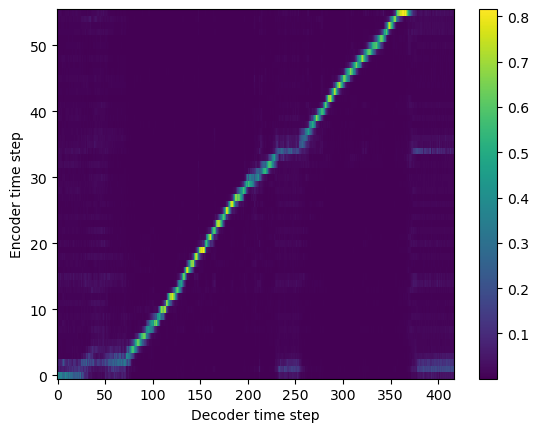

In [38]:
print(att_ws.shape)
plot_attention(att_ws)

torch.Size([1, 591, 57])


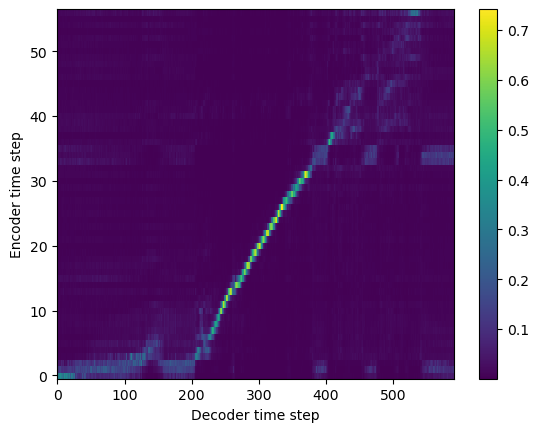

In [39]:
print(att_ws2.shape)
plot_attention(att_ws2)

torch.Size([1, 591, 56])


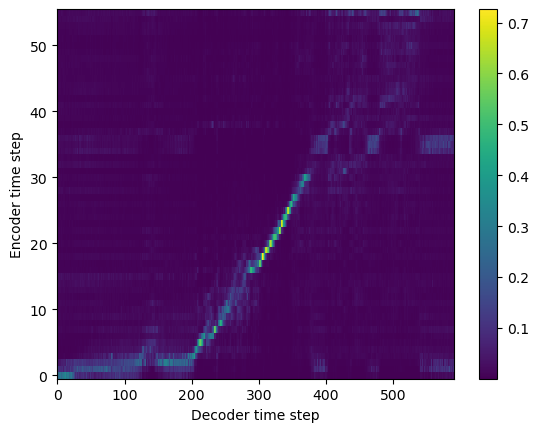

In [40]:
print(att_ws3.shape)
plot_attention(att_ws3)

In [41]:
outs_fine = outs_fine.to('cpu').detach().numpy()
print(outs_fine.shape)
outs_fine2 = outs_fine2.to('cpu').detach().numpy()
print(outs_fine2.shape)
outs_fine3 = outs_fine3.to('cpu').detach().numpy()
print(outs_fine3.shape)

(1, 417, 80)
(1, 591, 80)
(1, 591, 80)


In [42]:
import torch
import librosa
import librosa.display

sr = 16000
n_fft = 800
hop_length = 200
win_length = 800
n_mels = 80

min_value = -80
max_value = 0

restored_mel_spectrogram = outs_fine[0] * (max_value - min_value) + min_value
power_spec = librosa.db_to_power(restored_mel_spectrogram.T)#, ref=np.max)

inverse_mel_spectrogram = librosa.feature.inverse.mel_to_stft(
    M=power_spec,
    sr=sr,
    n_fft=n_fft
)

reconstructed_waveform = librosa.griffinlim(
    inverse_mel_spectrogram,
    n_iter=100,
    hop_length=hop_length,
    win_length=win_length
)

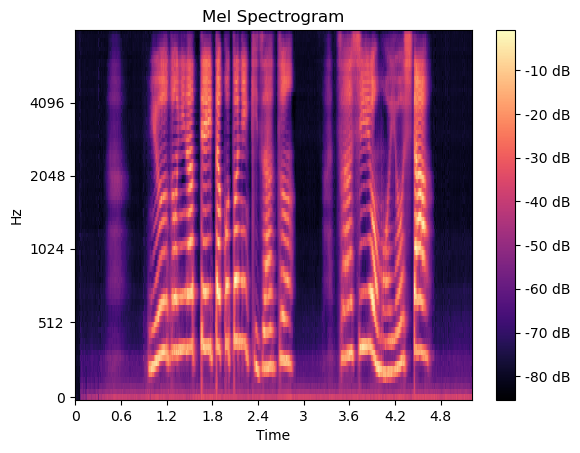

In [43]:
# メルスペクトログラムの表示
librosa.display.specshow(restored_mel_spectrogram.T, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [44]:
WAV_DIR = "F:/ROHAN4600マルチモーダルデータベース/wav_outs/"

import soundfile as sf

# 音声波形を保存するパスとサンプリングレートを指定します
output_path = WAV_DIR + '0200.wav'
sr = 16000  # 例として44100Hzのサンプリングレートを使用します

# 音声波形を保存します
sf.write(output_path, reconstructed_waveform, sr)